## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2datasetd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
sns.set_context('talk')



***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [3]:
dataset = pd.read_csv('titanic copy.csv') 

print(dataset.info())
print(dataset.describe())
print(dataset.shape)




       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [4]:
skip = dataset.isnull().sum()

print(skip)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

----------------------------------------------------------------------------------------------------------
За допомогою цього коду, можна зрозуміти, що найбільше пропущених значень у cabin, також багато не заповнених полів у age, також  є тільки 2 припущених значень у Embarked.

----------------------------------------------------------------------------------------------------------


***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



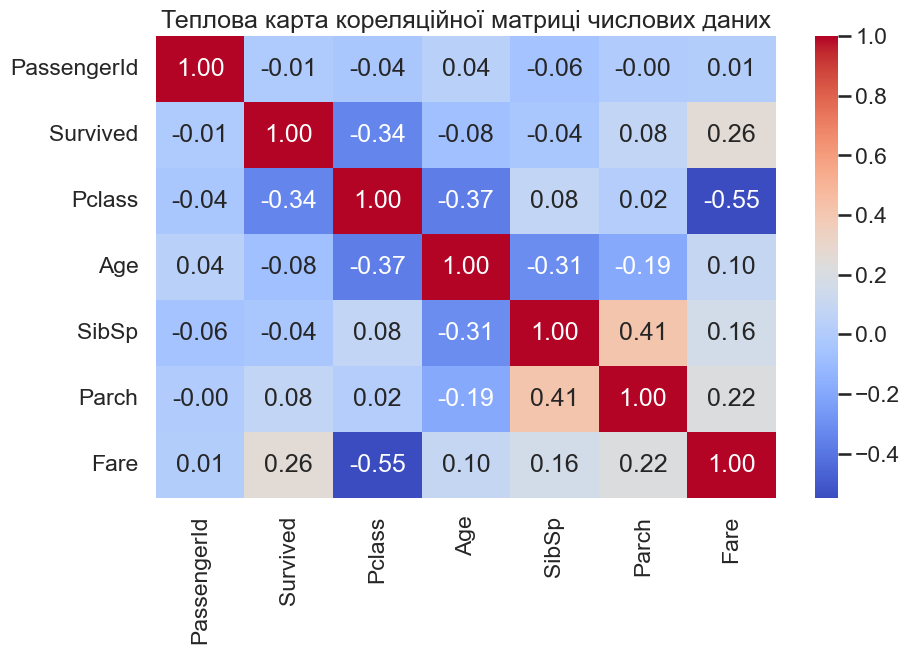

In [24]:
numdata = dataset.select_dtypes(include=[np.number])
matrix = numdata.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Теплова карта кореляційної матриці числових даних')
plt.show()


Ваші висновки:

----------------------------------------------------------------------------------------------------------
Коли ми бачимо високі кореляції між певними змінними, це означає, що вони сильно пов'язані між собою, і це може допомогти нам у прогнозуванні. Але якщо кореляція між змінними низька, це може означати, що вони не дуже впливають одна на одну або на те, що ми намагаємося передбачити.

----------------------------------------------------------------------------------------------------------

Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [30]:
def fill_missing_values_with_median_corrected(dataset, target, group):
    """
    Функція заповнює пропущені значення в цільовій колонці медіаною, розрахованою за групами.
    
    :param dataframe: DataFrame для обробки.
    :param target_column: Назва колонки, в якій потрібно заповнити пропущені значення.
    :param grouping_columns: Список колонок для групування перед розрахунком медіани.
    :return: DataFrame з заповненими пропущеними значеннями.
    """
    return dataset.fillna({
        target: dataset.groupby(group)[target].transform('median')
    })

dataset_fill = fill_missing_values_with_median_corrected(dataset, 'Age', ['Pclass', 'Sex'])



Ваші висновки:

----------------------------------------------------------------------------------------------------------
У датасеті Titanic було виявлено 177 пропущених значень у колонці віку. Заповнення цих пропусків медіаною за групами дозволило ефективно вирішити цю проблему без втрати цінної інформації.

----------------------------------------------------------------------------------------------------------

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





/var/folders/w6/d2qw7g4x7bqd_h483v7f6s_h0000gn/T/ipykernel_62535/4138514406.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age_bin = dataset.groupby('Age_bin')['Survived'].sum()


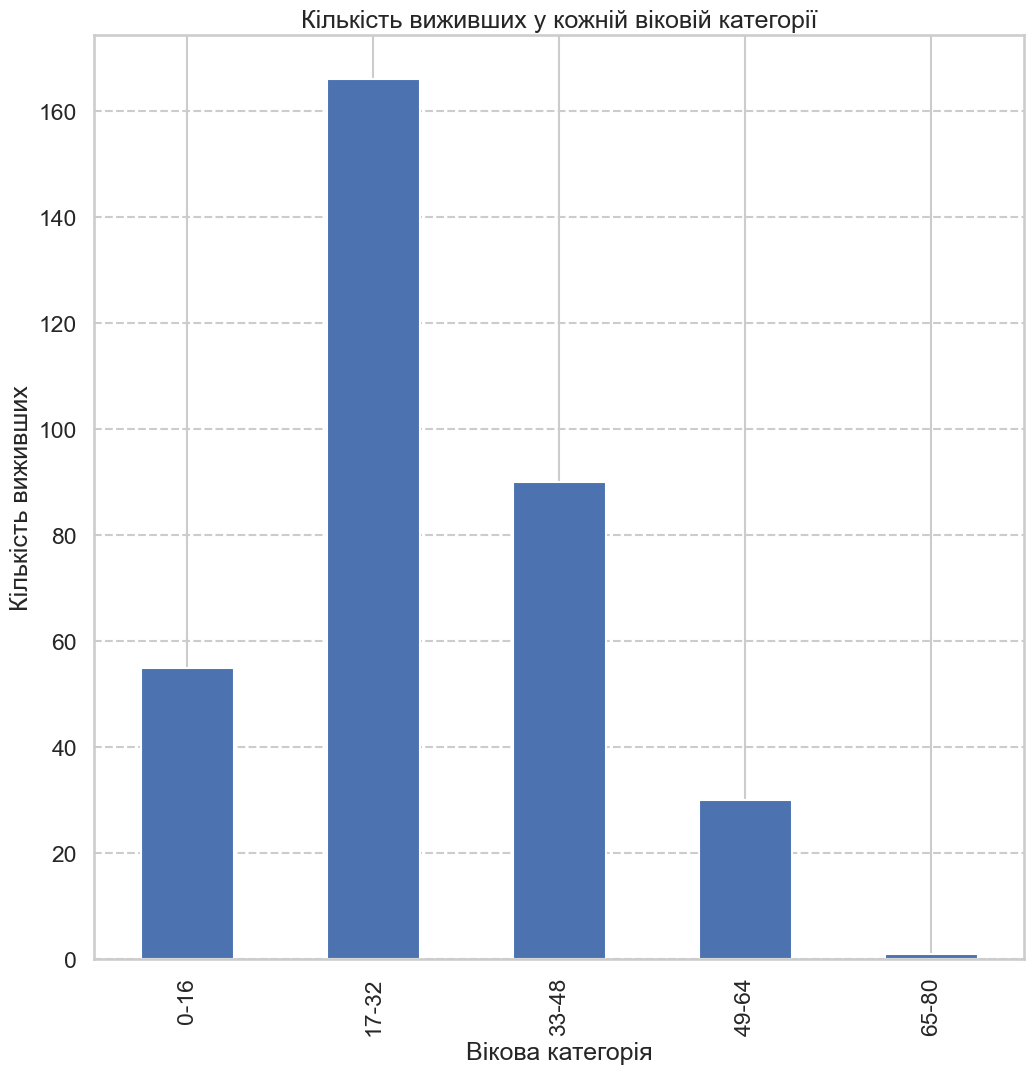

In [35]:
dataset['Age'] = dataset.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])

survived_by_age_bin = dataset.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(12, 12))
survived_by_age_bin.plot(kind='bar')
plt.title('Кількість виживших у кожній віковій категорії')
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість виживших')
plt.xticks(np.arange(5), labels=['0-16', '17-32', '33-48', '49-64', '65-80'])
plt.grid(axis='y', linestyle='--')
plt.show()


***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Fare_bin
0     44
1     68
2    101
3    129
Name: Survived, dtype: int64


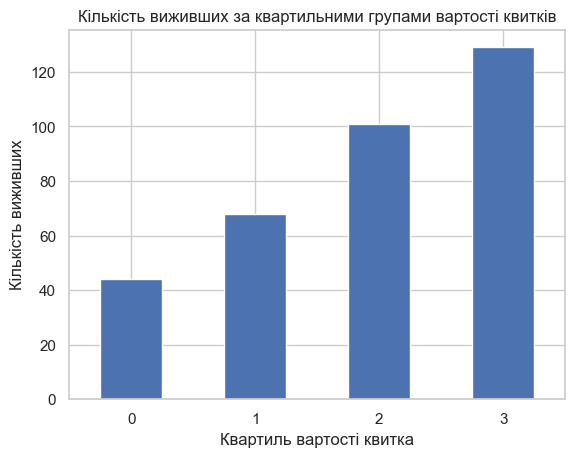

In [49]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], 4, labels=False)
fare_bin = dataset.groupby('Fare_bin')['Survived'].sum()

print(fare_bin)

fare_bin.plot(kind='bar')
plt.title('Виживші за кг вартості квитків')
plt.xlabel('Квартиль вартості квитка')
plt.ylabel('К-сть виживших')
plt.xticks(rotation=0)
plt.show()


Ваші висновки:

----------------------------------------------------------------------------------------------------------
На графіку видно, що кількість виживших пасажирів зростає з підвищенням вартості квитка. Пасажири, які заплатили за квитки ціну, що потрапляє в найвищу квартиль, мають найбільшу кількість виживших. У той час як пасажири з найнижчою квартильною вартістю квитка вижили найменше. Це може свідчити про те, що більш висока плата за проїзд могла бути пов’язана з кращим розміщенням на борту або кращим доступом до шлюпок і засобів порятунку. 

----------------------------------------------------------------------------------------------------------

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

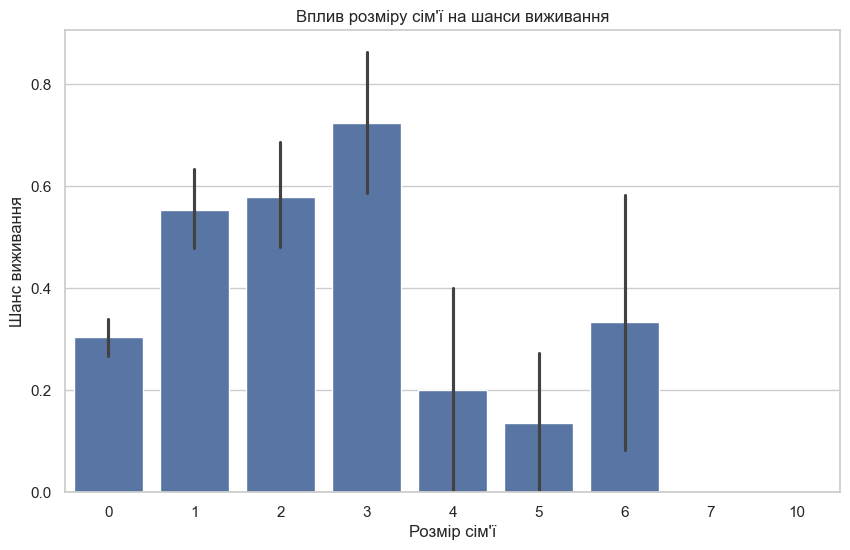

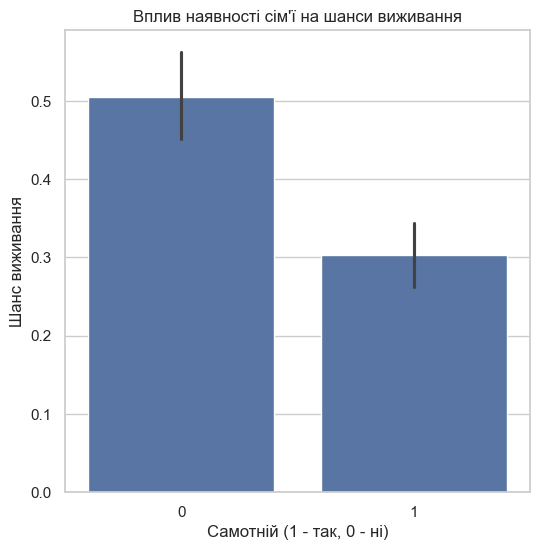

In [50]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Survived', data=dataset)
plt.title('Вплив розміру сім\'ї на шанси виживання')
plt.xlabel('Розмір сім\'ї')
plt.ylabel('Шанс виживання')
plt.show()

plt.figure(figsize=(6, 6))
sns.barplot(x='Alone', y='Survived', data=dataset)
plt.title('Вплив наявності сім\'ї на шанси виживання')
plt.xlabel('Самотній (1 - так, 0 - ні)')
plt.ylabel('Шанс виживання')
plt.show()

Ваші висновки:

----------------------------------------------------------------------------------------------------------

Пасажири, які подорожували з сім'єю, мали вищі шанси на виживання порівняно з тими, хто був на борту сам. Шанси виживання здаються вищими для пасажирів з сімейним розміром від 1 до 3. Особи, які були на борту без сім'ї, мають менший шанс виживання. Проте, дуже великі сім'ї (розміром 4 і більше) показують зниження шансів на виживання. Це може свідчити про те, що наявність декількох членів сім'ї підтримувала моральний дух і допомагала в виживанні, але в той же час занадто велика кількість членів сім'ї могла ускладнити евакуацію.

----------------------------------------------------------------------------------------------------------

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [37]:
clean = dataset.drop('Cabin', axis=1)
clean.to_csv('оновлений_titanic.csv', index=False)

Ваші висновки:

----------------------------------------------------------------------------------------------------------
Тому що у Cabin багато пропущених значень, які на мою думку неможливо заповнити.

----------------------------------------------------------------------------------------------------------

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [55]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

sex_mapping = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, embarked_dummies], axis=1)

dataset.drop('Embarked', axis=1, inplace=True)

label_encoder = LabelEncoder()
dataset['Title'] = label_encoder.fit_transform(dataset['Title'])

print(dataset.head())

title_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(title_mapping)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  NaN  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.0      1      0   
2                             Heikkinen, Miss. Laina  NaN  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.0      1      0   
4                           Allen, Mr. William Henry  NaN  35.0      0      0   

             Ticket     Fare  ... Title  Embarked_C  Embarked_Q  Embarked_S  \
0         A/5 21171   7.2500  ...    12       False       False        True   
1          PC 17599  71.2833  ...    13        True       False       False   
2  STON/O2. 3101282   7.9250  ...     9       False       F

Ваші висновки:

----------------------------------------------------------------------------------------------------------
Перетворення змінних в числові значення є критично важливим для аналізу даних, оскільки більшість алгоритмів машинного навчання вимагають, щоб усі вхідні дані були в числовому форматі.

----------------------------------------------------------------------------------------------------------

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



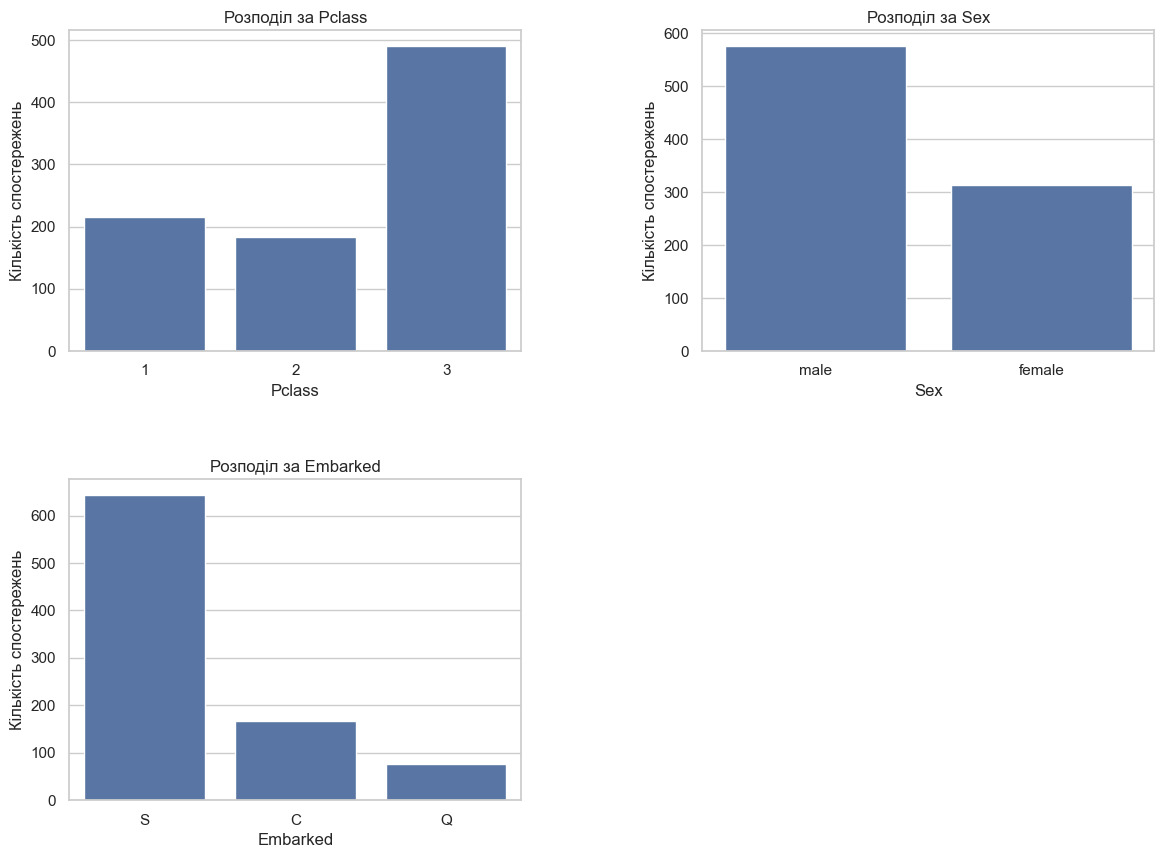

In [52]:
categorical_vars = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 

for i, var in enumerate(categorical_vars):
    sns.countplot(data=dataset, x=var, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Розподіл за {var}')
    axes[i//2, i%2].set_ylabel('Кількість спостережень')
    axes[i//2, i%2].set_xlabel(var)

axes[1, 1].set_visible(False)

plt.show()

Ваші висновки:

----------------------------------------------------------------------------------------------------------
На графіках видно, що більшість пасажирів подорожували третім класом, що вказує на домінування економічно доступніших квитків серед мандрівників "Титаніка". Чоловіків на борту було більше, ніж жінок, що могло вплинути на стратегії виживання під час катастрофи. Більшість пасажирів сіли на борт у Саутгемптоні, роблячи його головним портом відправлення. 

----------------------------------------------------------------------------------------------------------


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

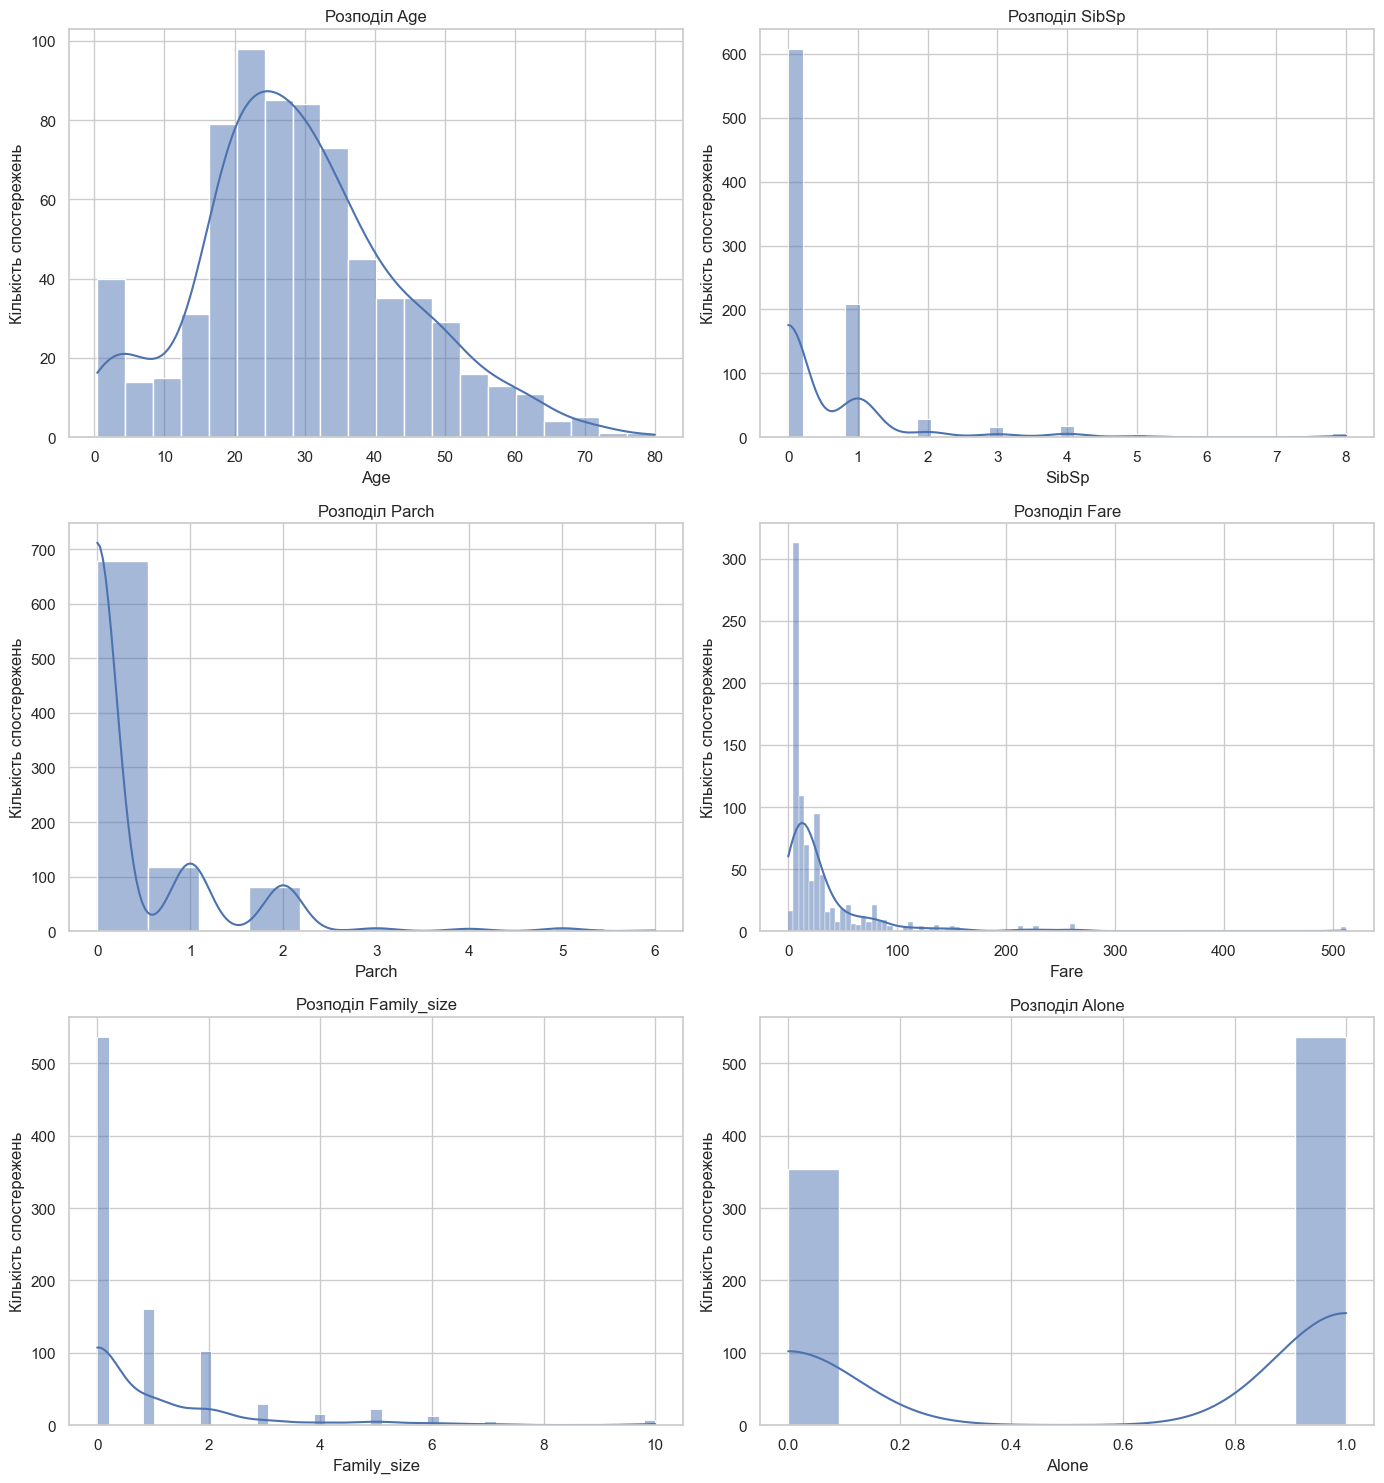

In [53]:
dataset['Family_size'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

numeric_vars = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Alone']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3) 

for i, var in enumerate(numeric_vars):
    sns.histplot(dataset[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Розподіл {var}')
    axes[i//2, i%2].set_ylabel('Кількість спостережень')
    axes[i//2, i%2].set_xlabel(var)

if len(numeric_vars) % 2 != 0:
    axes[len(numeric_vars)//2, len(numeric_vars)%2].set_visible(False)

plt.tight_layout()
plt.show()

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

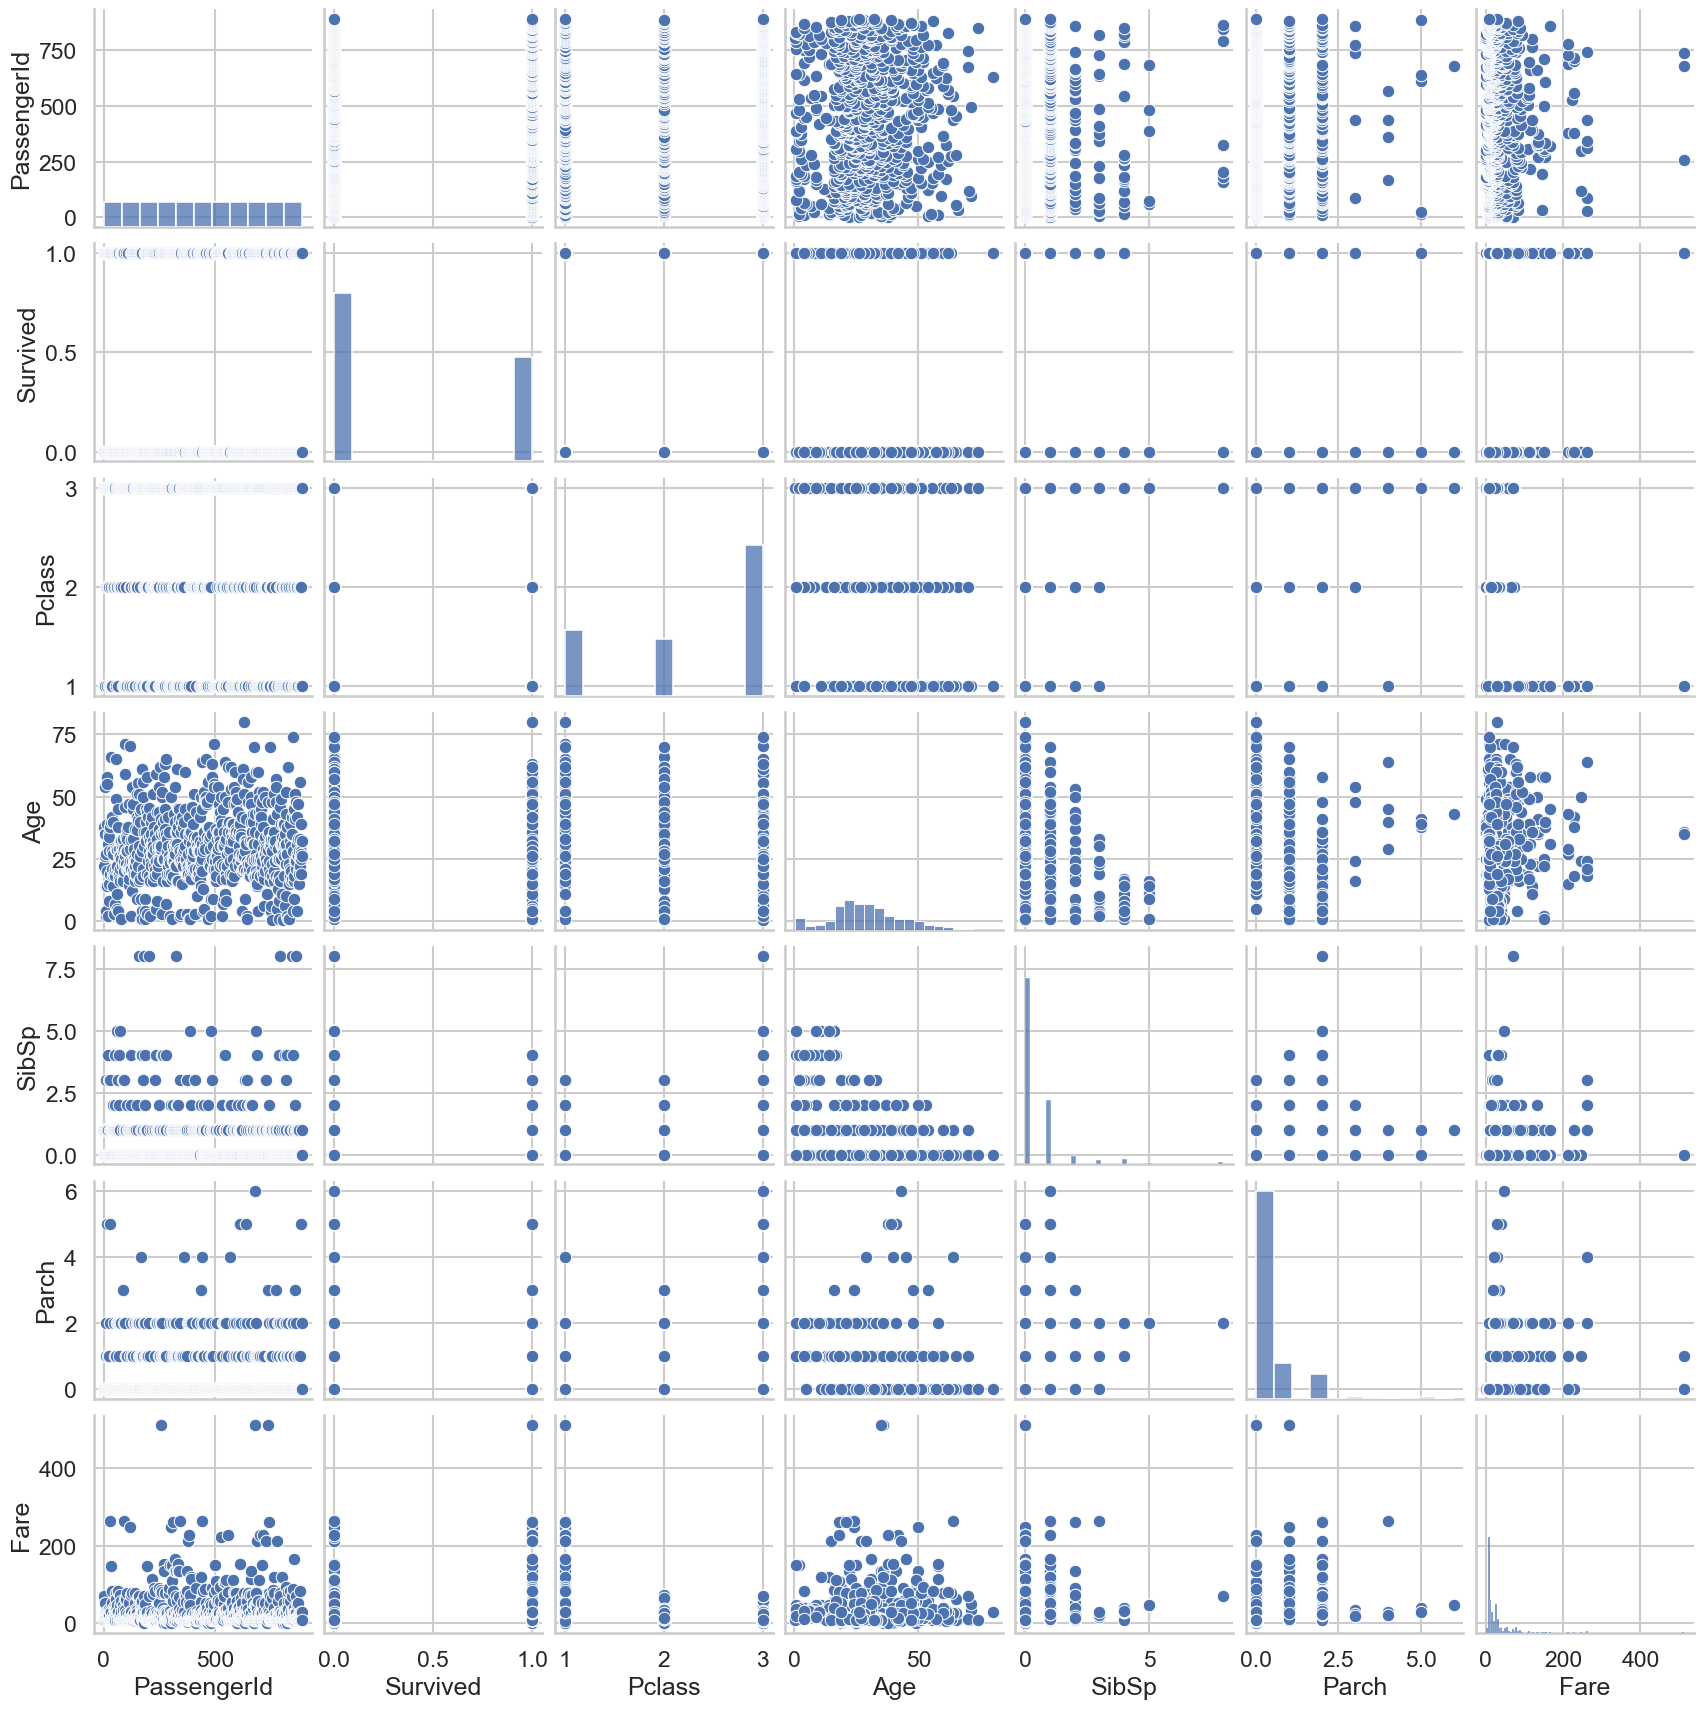

<Figure size 1000x1000 with 0 Axes>

In [23]:
sns.pairplot(dataset)
plt.show()

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.